version 3.0

# Data Analysis using Pandas and Matplotlib

A good source of data sets https://data.gov.ie/ <br>
Met Eireann Historical data available:<br>

https://www.met.ie/climate/available-data/long-term-data-sets

In this lesson we are going to import historical data from Met eireann and analyise it using Panda's and plot the results using Matplotlib.



In [ ]:
# import the list of stations
import pandas as pd
# Plot Library
from matplotlib import pyplot as plt
import numpy as np

## Import the CSV and Print Dataframe

In [ ]:
# No need for a directory path if in the same directory, index_col = 'Year'
df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/DublinAirportClean.csv")

In [ ]:
#print(df)

In [ ]:
df.columns

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

## Changing the Index

In [ ]:
# Make the Year the index value permanently
df.set_index('Year', inplace = True)
#df.reset_index(inplace = True)

In [ ]:
df

In [ ]:
#df.loc[2009]
df.loc[1854, 'Apr']

In [ ]:
# Output the year values( )
df.index


In [ ]:
## Using iloc
#df['Jan']
#rain_y = df.iloc[5]
#print(rain_y)

In [ ]:
#Simple Plot
plt.rcParams['figure.figsize'] = [16, 8]# set the size of your graph
plt.style.use('Solarize_Light2') # style
plt.bar(df.index,df.Jan)
plt.bar(df.index,df.Aug)

## Apply Lambda Function to Pandas Data Frame
The distance d in inches (″) is equal to the distance d in millimeters (mm) divided by 25.4:

In [ ]:
# Millmeterss to inches
def to_inches(x):
    y= x* 0.0393701
    return round(y,2)

In [ ]:
print(to_inches(75.8))

In [ ]:
x= 123
convert_to_inches = lambda x:round(x*0.0393701,2)
print(convert_to_inches(x))

In [ ]:
# Convert the January figures to inches and append as a new column at the end
df['Jan_inches'] = df.apply(lambda x: round(x['Jan']*0.0393701,2), axis=1) # axis =1 is a column
df

## SAQ 1 - Inching Forwards
Using a Lambda function, add a new column to the df dataframe with the month of August converted to inches



In [ ]:
#Add your answer here


## Create a filter
Our objective is to print out a bar chart that prints out the rain values for January, August and November at five or ten year intervals.

In [ ]:
# Create a list with a fewer number of years
nums = range(1850,2020,10)

#print List
my_list = []
for n in nums:
    my_list.append(n)
print(my_list)

In [ ]:
# Filter out the data for those years using the 'isin' method
filt = df.index.isin(my_list)

print(filt)

In [ ]:
x_values = df.loc[filt, 'Aug']
print(x_values)

## Create a new dataframe with the information that we want


In [ ]:
# Create a new DataFrame with the data we want
newDF = df.loc[filt, ['Jan', 'Aug', 'Nov','Dec']]
print(newDF)

In [ ]:
# Print our new plot
plt.plot(newDF.index,newDF.Jan)
plt.plot(newDF.index,newDF.Aug)
plt.plot(newDF.index,newDF.Nov)
plt.plot(newDF.index,newDF.Dec)

In [ ]:
# Change to a bar plot
plt.bar(newDF.index,newDF.Jan)
plt.bar(newDF.index,newDF.Aug)
plt.bar(newDF.index,newDF.Nov)





## Hmmm...
Let us try to sort out this mess...

In [ ]:
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 6]
width = 2.00
offset = 2.00
offset1 = 4.00

plt.bar(newDF.index - offset, newDF.Jan, width = width, label = 'January Rain')
plt.bar(newDF.index ,  newDF.Aug, width = width, color = 'k', label = 'August Rain')
plt.bar(newDF.index + offset, newDF.Nov, width = width, label = 'November Rain')
plt.bar(newDF.index + offset1, newDF.Dec, width = width, label = 'December Rain')

plt.title('Rain- Dublin Airport(1860-2010)')
plt.xlabel('Year')
plt.ylabel('Rain mm')
plt.grid(True)
plt.legend()

# Statistical Analysis

## Simple Stats

In [ ]:
# Mean and Median
print(round(df['Jan'].mean(),2))

# newDF['Jan'].mean()

In [ ]:
# Statistic on all of the dataframe
df.max()

In [ ]:
# General Statistics
df.describe()

## Grouping Data
When grouping data it is a three phase process (carried out by Python). Split (into separate tables), apply a function (to each table), recombine( into one table).

In [ ]:
# load a new set of data for Killarney
kill_df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/Killarney_1881-1933.csv")
kill_df

In [ ]:
#Get the shape of the dataframe
kill_df.shape

In [ ]:
# Step 1
year_group = kill_df.groupby(['Year'])
# print(kill_df["Max C)"])

In [ ]:
# Step 2
year_group.get_group(1933)

In [ ]:
# Same as filter 
filt = kill_df['Year']== 1932
kill_df.loc[filt]

In [ ]:
kill_df.loc[filt,['Min (C)']].min()

In [ ]:
# Step 3: Get the lowest temp for each year from 1881
year_group['Max C)'].max()

In [ ]:
year_group = kill_df.groupby(['Year'])
year_group['M axC)'].max()

# Widgets

In [ ]:
# The widgets library
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

# Define a function
def my_function(x):
    return x**5

In [ ]:
 #When you move the slider, the function is called, and its return value is printed.
interact(my_function, x=10);

In [ ]:
#Another Widget
widgets.SelectionSlider(
    options = ['Football', 'Hurling', 'F1', 'golf','soccer'],
    value='Football',
    description='I like sport',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

In [ ]:
#Another Widget
widgets.IntSlider(
    min=0,
    max=10,
    step=2,
    description='Slider:',
    value=3
)

In [ ]:
#Create a combo box/drop down
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
    return(name)

     
x = widgets.interact(say_my_name, name=["Jim", "Emma", "Bond", "Morgan"] );


## MAQ 2 - Daily Widget
Create a widget that gives a list of days and when a day is selected it returns the day of the week number.



#Add your answer here
# The widgets library
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

def day_of_week(day):
    """
    Print the current widget value in short sentence
    """
    if day == "Mon":
        day_no = 1
    elif day == "Tue":
        day_no = 2
    elif day == "Wed":
        day_no = 3    
    else:
        day_no = 4    
    
    print(f'The day number is {day_no}')
     
widgets.interact(day_of_week, day=["Mon", "Tue", "Wed","Thu","Fri","Sat","Sun"]);



In [ ]:
# Add your answer here
import ipywidgets as widgets 
from ipywidgets import interactive 
from ipywidgets import interact



## Plotting with a widget

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 7]

def my_function(m, c):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x  + c)
    plt.plot(x, m * x**2 + 1*x + c)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(my_function, m=(-2.0, 2.0), c=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

In [ ]:
#
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x)*2)
plt.plot(x, np.cos(x))

plt.show()

In [ ]:
 y_values= list(np.around(np.arange(-2.0, 2.2, +0.2),2))

In [ ]:
print( y_values)

In [ ]:
# A Sine wave y= A*Sin(wt)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Get x values of the sine wave
time  = np.arange(0, 20, 0.1);

def my_sine(w, A):
# Amplitude of the sine wave is sine of a variable like time
    amplitude   = np.sin(w*time)*A
# Plot a sine wave using time and amplitude obtained for the sine wave
    plt.plot(time, amplitude)
# Give a title for the sine wave plot
    plt.title('Sine wave')
# Give x axis label for the sine wave plot
    plt.xlabel('Time')
    plt.yticks(( y_values))
# Give y axis label for the sine wave plot

    plt.ylabel('Amplitude = sin(time)')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
# Display the sine wave
interactive_plot = interactive(my_sine, w=(1, 4), A=(0,2,0.2))
#output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

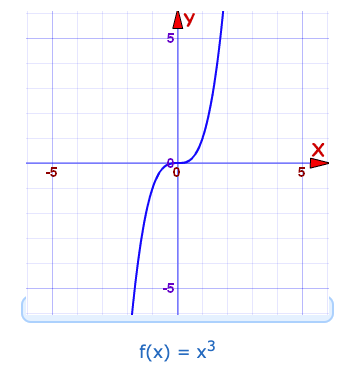

## MAQ3: Cubinism
Using widgets plot a graph of a x cubed + c <br>
y = $x^3 + c$

In [ ]:
#Put your answer here
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 7]


## EU Vaccine Data
This is a quick look at Open Source data you can directly link to. In this case EU data portal ECDC.

In [ ]:
# Connect to the datasource
import pandas as pd
import numpy as np
url = "https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv"
# import into Pandas and set the index to Reporting Country
df_vac = pd.read_csv(url, index_col = 'ReportingCountry')
# print a list of columns
df_vac.columns

In [ ]:
# How many rows and columns
df_vac.shape

In [ ]:
# Look at 100 rows
df_vac.tail(10)

In [ ]:
# How many rows and columns
vac_rec = df_vac.groupby("ReportingCountry")["NumberDosesReceived"].sum()

In [ ]:
# print dataframe
vac_rec

In [ ]:
# Import Widgets and use a widget to filter the information
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

#function to filter data for one country
def filter_by_country(country):
    filt = df_vac.index == country
    new_df_vac =df_vac.loc[filt,['YearWeekISO','NumberDosesReceived','Vaccine']] 
    return new_df_vac
    

In [ ]:
# Get a list of unique countries
country_list = list(df_vac.index.unique())

#print(country_list)
# Use widgets to interact with the list of countries
widgets.interact(filter_by_country, country = country_list);

#filter_by_country(country)

In [ ]:
df_vac

In [ ]:
new_df_vac = filter_by_country("IE")


vac_rec_IE = new_df_vac.groupby(['ReportingCountry','Vaccine'])["NumberDosesReceived"].sum()

In [ ]:
vac_rec_IE

In [ ]:
vac_rec = df_vac.groupby(['ReportingCountry','Vaccine'])["NumberDosesReceived"].sum()

In [ ]:
vac_rec.tail(70)

In [ ]:
#Interaactive filter by Country
def filter_by_country(country):
    filt = df_vac.index == country
    new_df_vac =df_vac.loc[filt,['YearWeekISO','NumberDosesReceived','Vaccine']] 
    return new_df_vac

In [ ]:
# Get a list of unique countries
new_df_vac = filter_by_country("IE")
# filter 
filt = new_df_vac['YearWeekISO']== '2021-W47'
ans_df = new_df_vac.loc[filt]
ans_df.head(55)

## SAQ 4: Slippery Question!
Inport the data for Dublin Airport and plot the December Rainfall from 1951 to 1981 in 5 year intervals

In [ ]:
# load a new set of data for Blaksod # No need for a directory path if in the same directory, index_col = 'Year'
df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/DublinAirportClean.csv",index_col = 'Year')

**Phew!** <div>
<img src="images/the_end.png" alt="The End" width="300" align="center"/></div>